## My best hyperparameter setting in HW1:
hidden nodes: 11

learning rate: 0.1

weight decay: 0.0001

epoch: 300

=> loss 約0.32

## The code of the weight-tuning_LG:

將learning_rate固定在0.1

共用了4773 Epochs才到達Loss低於0.34

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
data = fetch_california_housing()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# 將數據轉換為 PyTorch 張量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [12]:
# 設定超參數
D_in = X.shape[1]
H = 11
D_out = 1

In [13]:
# Define 2-layer neural network
model = torch.nn.Sequential(
  torch.nn.Linear(D_in, H),
  torch.nn.Tanh(),
  torch.nn.Linear(H, D_out)
)

In [14]:
# 損失函數和learning rate
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

Epoch 0/100, Loss: 5.3474
Epoch 100/100, Loss: 0.3957
Epoch 200/100, Loss: 0.3201
Epoch 300/100, Loss: 0.3054
Epoch 400/100, Loss: 0.2963
Epoch 500/100, Loss: 0.2930
Epoch 600/100, Loss: 0.2913
Epoch 700/100, Loss: 0.2977
Epoch 800/100, Loss: 0.2880
Epoch 900/100, Loss: 0.2871
Epoch 1000/100, Loss: 0.2862
Epoch 1100/100, Loss: 0.2851
Epoch 1200/100, Loss: 0.2852
Epoch 1300/100, Loss: 0.2845
Epoch 1400/100, Loss: 0.2844
Epoch 1500/100, Loss: 0.2846
Epoch 1600/100, Loss: 0.2838
Epoch 1700/100, Loss: 0.2827
Epoch 1800/100, Loss: 0.2831
Epoch 1900/100, Loss: 0.2902
Epoch 2000/100, Loss: 0.2819
Epoch 2100/100, Loss: 0.2842
Epoch 2200/100, Loss: 0.2813
Epoch 2300/100, Loss: 0.2819
Epoch 2400/100, Loss: 0.2810
Epoch 2500/100, Loss: 0.2811
Epoch 2600/100, Loss: 0.3055
Epoch 2700/100, Loss: 0.2805
Epoch 2800/100, Loss: 0.2847


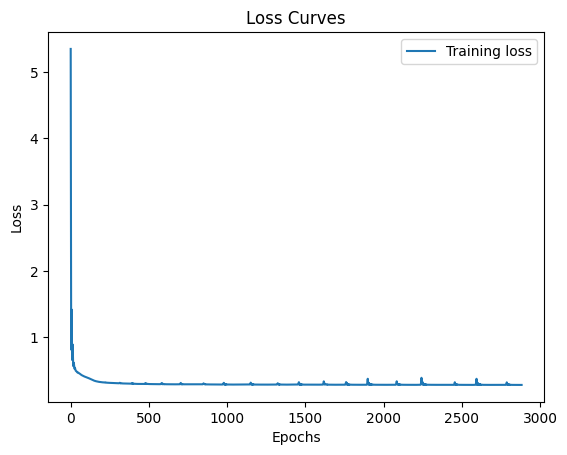

In [15]:
train_losses = []
# 訓練模型
loss = float('Inf')
epoch = 0
while loss > 0.28:
  optimizer.zero_grad()
  output = model(X_train)
  loss = criterion(output, y_train)
  loss.backward()
  optimizer.step()

  # Collect the training loss values in list
  train_losses.append(loss.item())

  if epoch % 100 == 0:
      print('Epoch {}/100, Loss: {:.4f}'.format(epoch, loss.item()))

  epoch += 1

# 畫loss curves圖
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

Epoch 2882, Loss: 0.27999600768089294


## The code of the weight-tuning_EB_LG:

Learning goal: loss < 0.38就stop








In [25]:
# Define 2-layer neural network
model_2 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out)
)

# 損失函數和learning rate
criterion = nn.MSELoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.1)

train_losses = []

# Train the network
loss = float('Inf')
for epoch in range(4000):
  if loss > 0.4:

    optimizer.zero_grad()
    output = model_2(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())
  else:
    break

  '''if epoch % 100 == 0:
    print('Epoch {}/4000, Loss: {:.4f}'.format(epoch+1, loss.item()))
print('--------')'''
if epoch+1 < 4000:
  print('Acceptable, Epoch {}, Loss: {}'.format(epoch+1, loss.item()))
else:
  print('Unacceptable, Epoch {}, Loss: {}'.format(epoch+1, loss.item()))



Acceptable, Epoch 758, Loss: 0.39994820952415466


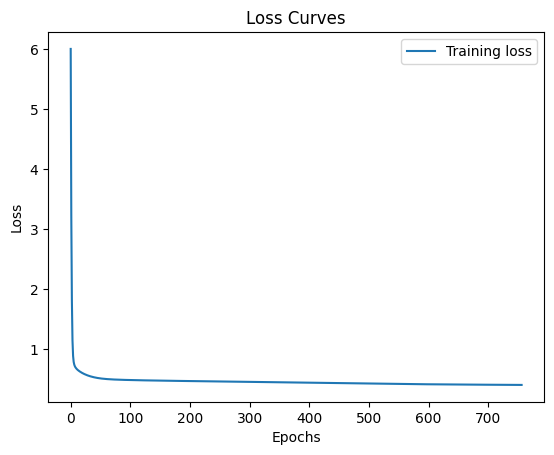

In [26]:
# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Evaluate the network
model.eval()
with torch.no_grad():
    test_outputs = model_2(X_test)
    test_loss = criterion(test_outputs, y_test)
    print('Test Loss: {}'.format(test_loss.item()))

Test Loss: 0.3943198025226593
